<div style="text-align: center;">
  <img src="https://images.pexels.com/photos/18275156/pexels-photo-18275156/free-photo-of-blanco-y-negro-ciudad-calle-coche.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1" alt="asda" style="max-width: 100%; height: auto;">
</div>


# clases

In [1]:
def basic_details(df):
    b = pd.DataFrame()
    b['N unique value'] = df.nunique()
    b['dtype'] = df.dtypes
    return b
# basic_details(train)

In [2]:
import pandas as pd
from sklearn.preprocessing import PowerTransformer

class yjtransformer:
    def __init__(self):
        self.transformer = PowerTransformer(method='yeo-johnson')
        self.fitted = False

    def fit_transform(self, data, column):
        """Aplica Yeo-Johnson a una columna específica y reemplaza los valores en el DataFrame original."""
        # Asegurar que la columna sea un array 2D
        values = data[column].values.reshape(-1, 1)
        # Ajustar y transformar la columna
        transformed_values = self.transformer.fit_transform(values)
        self.fitted = True
        # Reemplazar la columna original con la transformada
        data[column] = transformed_values
        return data

    def inverse_transform(self, data, column):
        """Invierte la transformación Yeo-Johnson en una columna específica."""
        if not self.fitted:
            raise ValueError("El transformador no ha sido ajustado aún. Llame a fit_transform primero.")
        
        # Asegurar que la columna sea un array 2D
        transformed_values = data[column].values.reshape(-1, 1)
        # Invertir la transformación
        original_values = self.transformer.inverse_transform(transformed_values)
        # Reemplazar la columna transformada con los valores originales
        data[column] = original_values
        return data
    
"""
# Crear una instancia del transformador Yeo-Johnson
yj_transformer = YeoJohnsonTransformer()

# Aplicar fit_transform a la columna 'y'
train_df = yj_transformer.fit_transform(train_df, 'y')

# Visualizar el DataFrame con la columna 'y' transformada
display(train_df['y'])

# Invertir la transformación de la columna 'y'
train_df = yj_transformer.inverse_transform(train_df, 'y')

# Visualizar el DataFrame con los valores originales de 'y'
display(train_df['y'])
"""


"\n# Crear una instancia del transformador Yeo-Johnson\nyj_transformer = YeoJohnsonTransformer()\n\n# Aplicar fit_transform a la columna 'y'\ntrain_df = yj_transformer.fit_transform(train_df, 'y')\n\n# Visualizar el DataFrame con la columna 'y' transformada\ndisplay(train_df['y'])\n\n# Invertir la transformación de la columna 'y'\ntrain_df = yj_transformer.inverse_transform(train_df, 'y')\n\n# Visualizar el DataFrame con los valores originales de 'y'\ndisplay(train_df['y'])\n"

In [3]:
from sklearn.preprocessing import PowerTransformer

class yjtransformer_columns: # antes era yjtransformer
    def __init__(self):
        # Diccionario para almacenar un transformador por cada variable
        self.transformers = {}
        self.fitted = {}

    def fit(self, data, columns):
        # Ajustar un transformador para cada columna especificada
        for col in columns:
            transformer = PowerTransformer(method='yeo-johnson')
            self.transformers[col] = transformer.fit(data[[col]])
            self.fitted[col] = True

    def transform(self, data, columns):
        # Aplica la transformación Yeo-Johnson a las columnas especificadas
        transformed_data = data.copy()
        for col in columns:
            if not self.fitted.get(col, False):
                raise RuntimeError(f"El transformador para la columna '{col}' debe ser ajustado antes de la transformación.")
            transformed_data[col] = self.transformers[col].transform(data[[col]])
        return transformed_data

    def fit_transform(self, data, columns):
        # Ajustar el transformador y transformar los datos para las columnas especificadas
        self.fit(data, columns)
        return self.transform(data, columns)

    def inverse_transform(self, data, columns):
        # Revertir la transformación Yeo-Johnson para las columnas especificadas
        transformed_data = data.copy()
        for col in columns:
            if not self.fitted.get(col, False):
                raise RuntimeError(f"El transformador para la columna '{col}' debe ser ajustado antes de revertir la transformación.")
            transformed_data[col] = self.transformers[col].inverse_transform(data[[col]])
        return transformed_data


In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, probplot

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, probplot

# dependent var de clase my_EDA
def plot_variable_distribution(y, message='', use_yeo_johnson=False):
    """
    Función para graficar: histograma y QQ plot para ver la distribución de una variable.

    Parámetros:
        y (pd.Series): Serie de pandas con los datos de la variable.
        message (str): Mensaje opcional sobre la necesidad de conversión.
        use_yeo_johnson (bool): Si True, aplica una transformación Yeo-Johnson a la variable.
    """
    # Verificar si se requiere aplicar la transformación Yeo-Johnson
    if use_yeo_johnson:
        from sklearn.preprocessing import PowerTransformer
        
        # Crear una instancia de PowerTransformer para Yeo-Johnson
        yj_transformer = PowerTransformer(method='yeo-johnson')
        
        # Aplicar la transformación Yeo-Johnson
        data = yj_transformer.fit_transform(y.values.reshape(-1, 1)).flatten()
    else:
        # Si no se solicita transformación, utilizar los datos tal cual
        data = y.dropna()

    # Crear figura
    f, (ax_left, ax_right1, ax_right2) = plt.subplots(1, 3, figsize=(20, 5), facecolor='whitesmoke')

    # Información sobre la variable
    ax_left.axis('off')
    ax_left.text(0.5, 0.9, 'Variable', color='crimson', size=22, weight='bold', ha='center')
    ax_left.text(0.5, 0.7, f'Skew: {pd.Series(data).skew():.2f}', size=20, ha='center')
    ax_left.text(0.5, 0.6, f'Kurt: {pd.Series(data).kurt():.2f}', size=20, ha='center')
    ax_left.text(0.5, 0.5, f'Missing count: {y.isnull().sum()}', size=20, ha='center')
    ax_left.text(0.5, 0.3, f'{message}', color='crimson', size=20, ha='center')

    # Histograma con ajuste normal
    sns.histplot(data, kde=True, stat='density', color='crimson', ax=ax_right1)

    # Ajustar distribución normal
    mu, std = norm.fit(data)
    xmin, xmax = ax_right1.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    ax_right1.plot(x, p, 'k', linewidth=2)

    ax_right1.spines[['top', 'right']].set_visible(False)
    ax_right1.set_title('Histogram', color='crimson', weight='bold', size=15)

    # QQ plot
    probplot(data, dist="norm", plot=ax_right2)
    ax_right2.spines[['top', 'right']].set_visible(False)
    ax_right2.set_title('QQ Plot', color='crimson', weight='bold', size=15)

    # Ajustar el diseño y mostrar la figura
    plt.tight_layout()
    plt.show()

La competencia **"Mercedes-Benz Greener Manufacturing"** en Kaggle desafía a los participantes a mejorar la eficiencia del sistema de pruebas para vehículos de Mercedes-Benz, utilizando un enfoque algorítmico avanzado. Aquí tienes una descripción detallada de la competencia y lo que necesitas hacer:

### **Descripción de la Competencia**

Desde el primer automóvil, el Benz Patent Motor Car en 1886, Mercedes-Benz ha sido pionero en innovaciones automotrices importantes, como el habitáculo de seguridad con zona de deformación, el airbag y los sistemas de asistencia inteligentes. Mercedes-Benz solicita casi 2000 patentes al año, siendo la marca líder europea entre los fabricantes de automóviles premium.

Para garantizar la seguridad y fiabilidad de cada configuración única de automóvil antes de que salga a la carretera, los ingenieros de Daimler han desarrollado un robusto sistema de pruebas. Sin embargo, optimizar la velocidad de su sistema de pruebas para tantas combinaciones posibles de características es complejo y consume mucho tiempo sin un enfoque algorítmico potente. Como uno de los mayores fabricantes de automóviles premium del mundo, la seguridad y eficiencia son primordiales en las líneas de producción de Daimler.

En esta competencia, Daimler desafía a los participantes a enfrentar la maldición de la dimensionalidad y reducir el tiempo que los automóviles pasan en el banco de pruebas. Los competidores trabajarán con un conjunto de datos que representa diferentes permutaciones de características de automóviles Mercedes-Benz para predecir el tiempo necesario para pasar las pruebas. Los algoritmos ganadores contribuirán a una prueba más rápida, resultando en menores emisiones de dióxido de carbono sin reducir los estándares de Daimler.

### **Evaluación**

Las presentaciones se evaluarán en función del valor \( R^2 \), también conocido como el coeficiente de determinación. Este valor mide la calidad de la predicción comparada con el valor real y se utiliza para evaluar qué tan bien el modelo explica la variabilidad en los datos.

### **Archivo de Presentación**

Para cada 'ID' en el conjunto de prueba, debes predecir la variable 'y'. El archivo debe contener un encabezado y tener el siguiente formato:

```
ID,y  
1,100  
2,100.33  
3,105.81  
...
```

### **Premios**

- **1er lugar**: $12,000

- **2do lugar**: $8,000

- **3er lugar**: $5,000

### **Cronograma**

- **3 de julio de 2017** - Fecha límite de inscripción. Debes aceptar las reglas de la competencia antes de esta fecha para participar.
- **3 de julio de 2017** - Fecha límite para la fusión de equipos. Este es el último día en el que los participantes pueden unirse o fusionar equipos.
- **10 de julio de 2017** - Fecha límite para la presentación final.

Todas las fechas límite son a las 11:59 PM UTC del día correspondiente, a menos que se indique lo contrario. Los organizadores de la competencia se reservan el derecho de actualizar el cronograma del concurso si lo consideran necesario.

### **Citación**

Alexander Novy, CH1Mercedes, Christian Drescher, Christian Pfaundler, KOESIM, Will Cukierski. (2017). Mercedes-Benz Greener Manufacturing. Kaggle. [https://kaggle.com/competitions/mercedes-benz-greener-manufacturing](https://kaggle.com/competitions/mercedes-benz-greener-manufacturing)

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, probplot, skew
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, make_scorer, mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler, PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import ElasticNetCV
import tensorflow as tf
import warnings
from IPython.display import display
import optuna
from optuna.samplers import TPESampler
from xgboost import XGBRegressor

# Ignorar advertencias
warnings.filterwarnings("ignore")


In [6]:
import sys
import os
sys.path.append('/kaggle/input/my-py-personal-utils-problemas-de-regresin')

# Importar el módulo de clases y objetos personales especificamente diseñado para manipular datos tabulares con pandas.
import my
from my import *

<h1 style="text-align: center;"> load data with pandas
  </h1>


In [7]:
def load2():
    train = pd.read_csv("/kaggle/input/mercedes-benz-greener-manufacturing/train.csv.zip", index_col ="ID")
    test = pd.read_csv("/kaggle/input/mercedes-benz-greener-manufacturing/test.csv.zip", index_col ="ID")
    all_data = pd.concat([train,test], axis=0)
    return train, test, all_data

train,test, all_data =load2() 

In [8]:
def load():
    train = pd.read_csv("/kaggle/input/mercedes-benz-greener-manufacturing/train.csv.zip", index_col ="ID")
    test = pd.read_csv("/kaggle/input/mercedes-benz-greener-manufacturing/test.csv.zip", index_col ="ID")
    all_data = pd.concat([train,test], axis=0)
    all_data = all_data.drop('y', axis = 1)
    return train, test, all_data

train,test, all_data =load() 

In [9]:
train.head()

,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
ID,,,,,,,,,,,,,,,,,,,,,
0,130.81,k,v,at,a,d,u,j,o,0,...,0,0,1,0,0,0,0,0,0,0
6,88.53,k,t,av,e,d,y,l,o,0,...,1,0,0,0,0,0,0,0,0,0
7,76.26,az,w,n,c,d,x,j,x,0,...,0,0,0,0,0,0,1,0,0,0
9,80.62,az,t,n,f,d,x,l,e,0,...,0,0,0,0,0,0,0,0,0,0
13,78.02,az,v,n,f,d,h,d,n,0,...,0,0,0,0,0,0,0,0,0,0


<h1 style="text-align: center;"> EDA
  </h1>


In [10]:
eda = my_EDA()
dirp(eda)
eda.info(all_data)


Object my_EDA created

['create_features', 'dependent_var', 'exploration_cat', 'exploration_num', 'get_missing_values', 'hypo_test', 'info', 'plot_high_corr_heatmap', 'plot_missing', 'scarplot_strongs_vars', 'vars_list']


None

====> This data contains 8418 rows and 376 columns

FEATURE NAME  DATA FORMAT   NULL VALUES(NUM-PERC)          SEVEN SAMPLES  
------------  -----------   ---------------------          -------------  
X385            int64          0 - nan %           0,0,0,0,0,0,0,
X0              object         0 - nan %           j,e,ak,ak,w,t,ap,
X1              object         0 - nan %           aa,v,aa,s,aa,l,s,
X2              object         0 - nan %           as,m,r,as,as,ae,au,
X3              object         0 - nan %           c,f,c,c,c,f,c,
X4              object         0 - nan %           d,d,d,d,d,d,d,
X5              object         0 - nan %           n,i,l,q,w,w,d,
X6              object         0 - nan %           e,g,h,j,l,j,j,
X8              object         0 - nan %           g,c,t,a,e,s,k,
X10             int64          0 - nan %           0,0,0,0,0,0,0,
X11             int64          0 - nan %           0,0,0,0,0,0,0,
X12             int64          0 - nan %           0,0,0,0,1,

,count,mean,std,min,25%,50%,75%,max
X10,8418.0,0.016156,0.126082,0.0,0.0,0.0,0.0,1.0
X11,8418.0,0.000119,0.010899,0.0,0.0,0.0,0.0,1.0
X12,8418.0,0.074721,0.262956,0.0,0.0,0.0,0.0,1.0
X13,8418.0,0.059515,0.236601,0.0,0.0,0.0,0.0,1.0
X14,8418.0,0.428011,0.494820,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
X380,8418.0,0.008078,0.089519,0.0,0.0,0.0,0.0,1.0
X382,8418.0,0.008197,0.090169,0.0,0.0,0.0,0.0,1.0
X383,8418.0,0.001069,0.032682,0.0,0.0,0.0,0.0,1.0
X384,8418.0,0.000594,0.024366,0.0,0.0,0.0,0.0,1.0


no veo valores anormales ni valores faltantes a imputar. El unico problema que veo es la dimensionalidad, vere si con tecnicas como PCA puedo mejorar el rendimiento predictivo

## 1.1 analisis de la variable dependiente

In [11]:
train2 = train.copy()
y = train2.y
train2 = train2.drop('y', axis = 1)



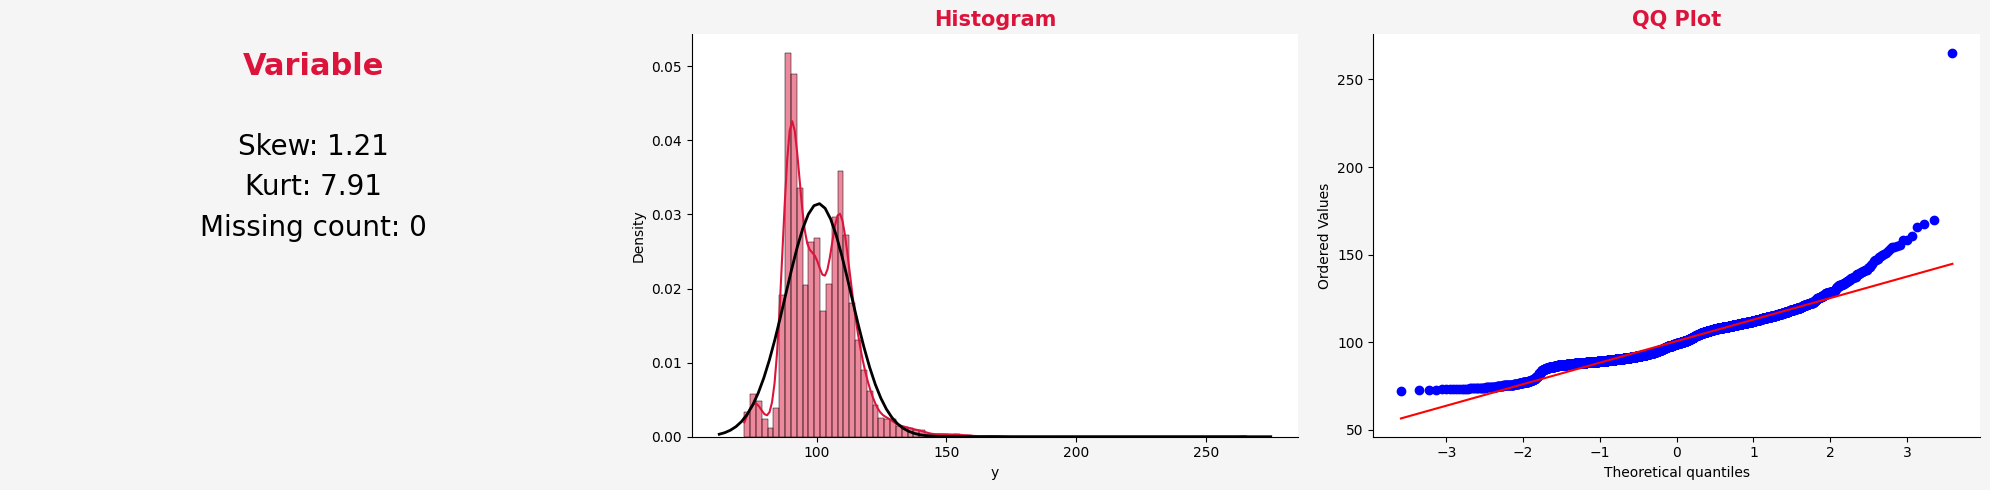

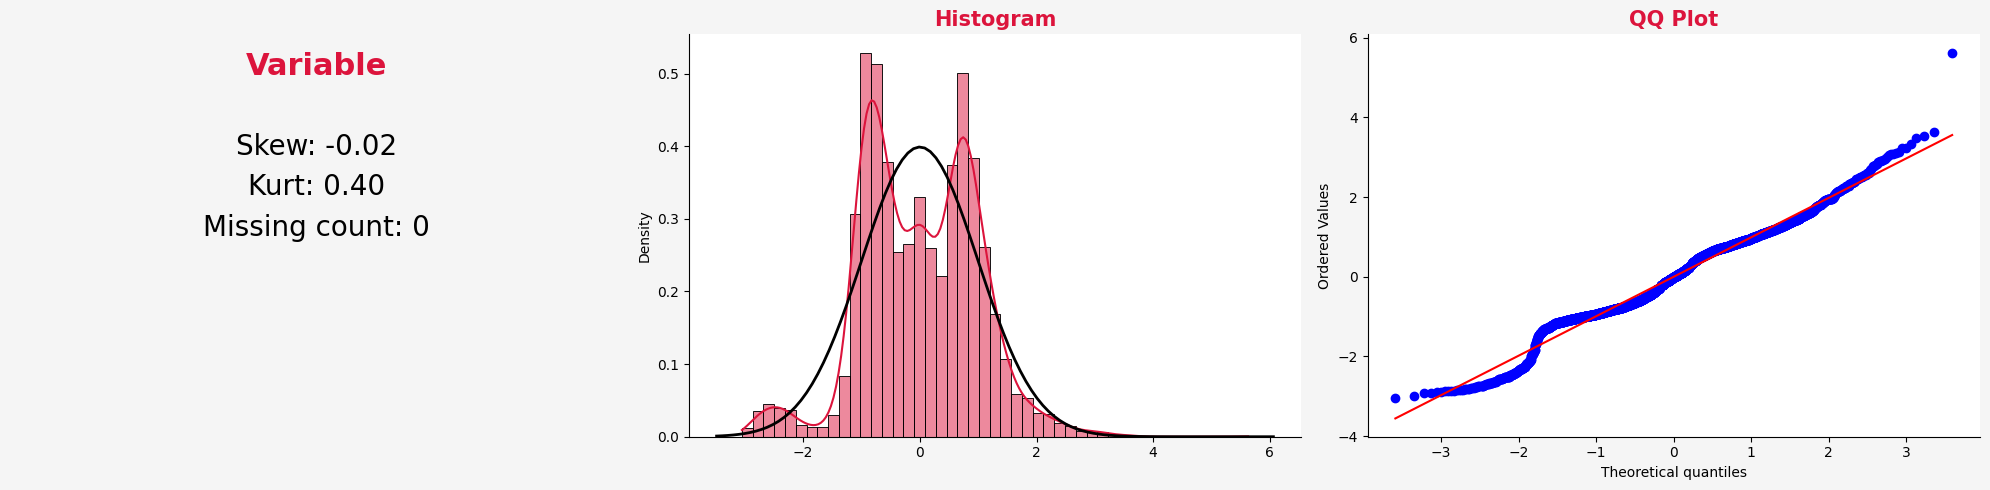

In [12]:
# jkl = eda.dependent_var(train, 'y')
plot_variable_distribution(y, use_yeo_johnson=False)
plot_variable_distribution(y, use_yeo_johnson=True)


Dado el ligero sesgo hacia la izquierda, utilizaremos transformador de tipo Yeo-johnson para normalizar la distribucion de probabilidad

## 1.2 analisis multivariado de correlación

['create_features', 'data', 'dependent_var', 'exploration_cat', 'exploration_num', 'get_missing_values', 'hypo_test', 'info', 'missing_values', 'plot_high_corr_heatmap', 'plot_missing', 'scarplot_strongs_vars', 'vars_list']


None

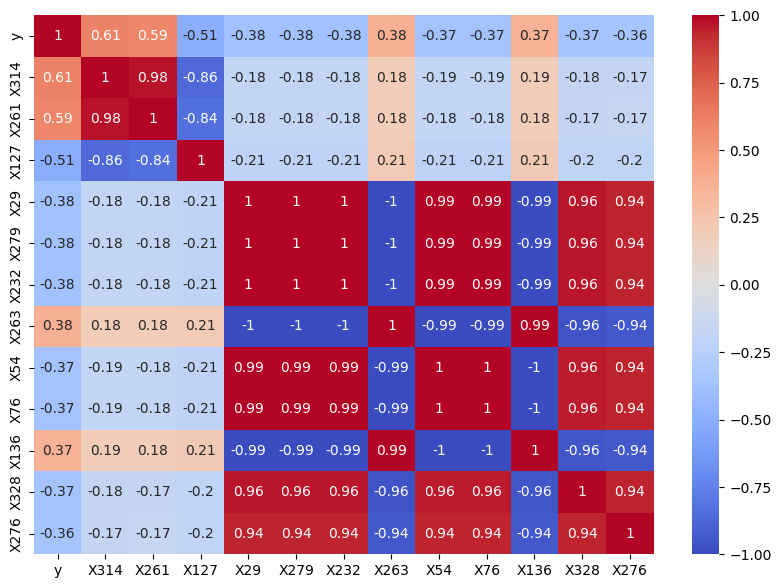

In [13]:
dirp(eda)
# graficando variables numericas mas importantes
corr = eda.plot_high_corr_heatmap(train, 'y')

In [14]:
corr = corr.drop('y')
corr = list(corr)
corr

['X314',
 'X261',
 'X127',
 'X29',
 'X279',
 'X232',
 'X263',
 'X54',
 'X76',
 'X136',
 'X328',
 'X276']

## 1.3 explorando variables mas correlacionadas con nuestra variable objetivo

['create_features', 'data', 'dependent_var', 'exploration_cat', 'exploration_num', 'get_missing_values', 'hypo_test', 'info', 'missing_values', 'plot_high_corr_heatmap', 'plot_missing', 'scarplot_strongs_vars', 'vars_list']


None

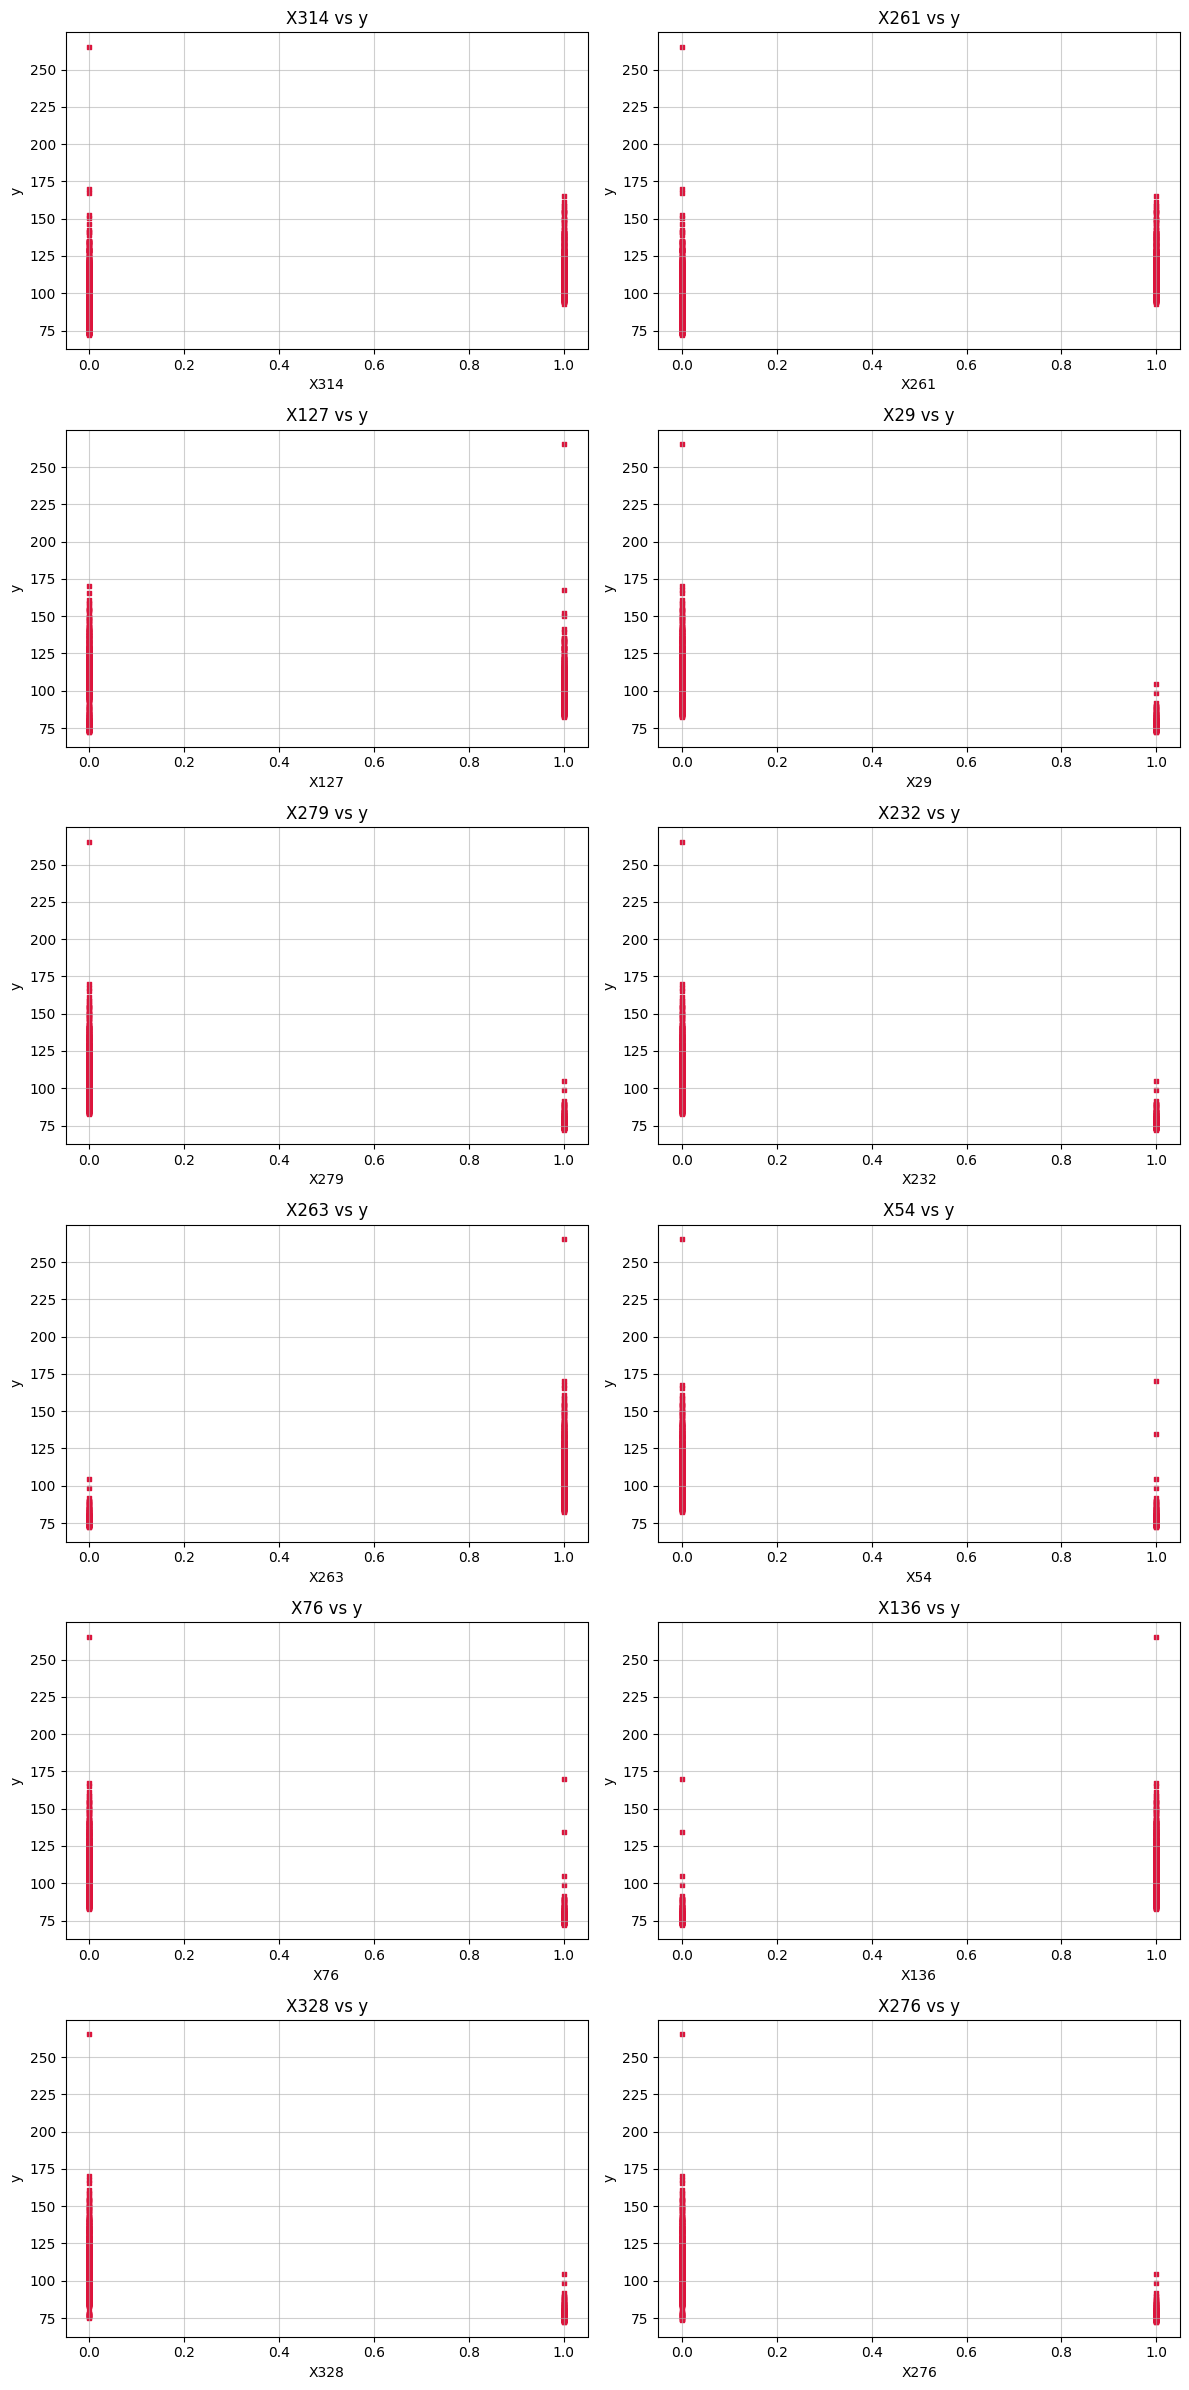

In [15]:
dirp(eda)
eda.scarplot_strongs_vars(train, 'y', corr)

In [16]:
all_data2 = all_data.copy()

# Definimos Base Line

In [17]:
# utilizamos validacion cruzada para nuestro r2
def score_r2(X, y, model=XGBRegressor()):
        
    # Metric for evaluating the model is R^2 (coefficient of determination)
    score = cross_val_score(
        model, X, y, cv=5, scoring="r2",
    )
    score_mean= score.mean()
    score_std= score.std()
    print(f"R² Baseline score \n - Mean: {score_mean:.5f} \n - StdDev: {score_std:.5f}")
    return score_mean

In [18]:
X = train2

In [19]:
from sklearn.linear_model import ElasticNet


# Pre Procesamiento y evaluacion 

## Buscando el mejor encoder para nuestras variables categoricas ? 

In [20]:
dirp(eda)

['create_features', 'data', 'dependent_var', 'exploration_cat', 'exploration_num', 'get_missing_values', 'hypo_test', 'info', 'missing_values', 'plot_high_corr_heatmap', 'plot_missing', 'scarplot_strongs_vars', 'vars_list']


None

### Embedings

In [21]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR


pre = my_preproc()
dirp(pre)

def separar(df, train):
    train_shape = train.shape[0]
    train = df.iloc[:train_shape,:]
    test = df.iloc[train_shape:,:]
    return train,test

def pipe1():
    train_df,test_df, all_data= load2()
    # y = train_df.y
    # X = train_df.drop('y', axis = 1)
    num_vars, cat_vars = eda.vars_list(all_data)
    all_data = pre.apply_embeddings(all_data, cat_vars, 12)

    train,test = separar(all_data, train_df)
    y=train.y
    X=train.drop('y', axis = 1)
    
    display(X.head())
    display(X.shape)

    print("\n XGBRegressor \n ")
    score_r2(X,y)
    
    model_elast = ElasticNetCV(alphas=[0.1, 1, 10], l1_ratio=0.5, cv=5) # Me gusto
    print("\n ElasticNet \n ")
    score_r2(X,y, model_elast)
    
    
pipe1()


pre-processing object is created

['add_mathematical_transformed_cols', 'apply_embeddings', 'best_k_plot', 'column_cluster__Kmeans', 'fill', 'get_dummies', 'label_encoder', 'list_skew_num', 'scaler_data_Robust', 'scaler_data_Standard']


None


Numerical vars: 
['y' 'X10' 'X11' 'X12' 'X13' 'X14' 'X15' 'X16' 'X17' 'X18' 'X19' 'X20'
 'X21' 'X22' 'X23' 'X24' 'X26' 'X27' 'X28' 'X29' 'X30' 'X31' 'X32' 'X33'
 'X34' 'X35' 'X36' 'X37' 'X38' 'X39' 'X40' 'X41' 'X42' 'X43' 'X44' 'X45'
 'X46' 'X47' 'X48' 'X49' 'X50' 'X51' 'X52' 'X53' 'X54' 'X55' 'X56' 'X57'
 'X58' 'X59' 'X60' 'X61' 'X62' 'X63' 'X64' 'X65' 'X66' 'X67' 'X68' 'X69'
 'X70' 'X71' 'X73' 'X74' 'X75' 'X76' 'X77' 'X78' 'X79' 'X80' 'X81' 'X82'
 'X83' 'X84' 'X85' 'X86' 'X87' 'X88' 'X89' 'X90' 'X91' 'X92' 'X93' 'X94'
 'X95' 'X96' 'X97' 'X98' 'X99' 'X100' 'X101' 'X102' 'X103' 'X104' 'X105'
 'X106' 'X107' 'X108' 'X109' 'X110' 'X111' 'X112' 'X113' 'X114' 'X115'
 'X116' 'X117' 'X118' 'X119' 'X120' 'X122' 'X123' 'X124' 'X125' 'X126'
 'X127' 'X128' 'X129' 'X130' 'X131' 'X132' 'X133' 'X134' 'X135' 'X136'
 'X137' 'X138' 'X139' 'X140' 'X141' 'X142' 'X143' 'X144' 'X145' 'X146'
 'X147' 'X148' 'X150' 'X151' 'X152' 'X153' 'X154' 'X155' 'X156' 'X157'
 'X158' 'X159' 'X160' 'X161' 'X162' 'X163' 'X

I0000 00:00:1724365209.304792     113 service.cc:145] XLA service 0x7881540034f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1724365209.304861     113 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


130/264 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

I0000 00:00:1724365209.708004     113 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
264/264 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
264/264 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
264/264 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
264/264 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
264/264 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
264/264 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
264/264 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,...,X8_emb_2,X8_emb_3,X8_emb_4,X8_emb_5,X8_emb_6,X8_emb_7,X8_emb_8,X8_emb_9,X8_emb_10,X8_emb_11
0,0,0,0,1,0,0,0,0,1,0,...,-0.026003,0.001249,0.038421,-0.043264,0.025496,0.032937,0.009159,-0.048489,0.031350,-0.039266
6,0,0,0,0,0,0,0,0,1,0,...,0.006495,0.009103,-0.039137,-0.034562,-0.010229,0.047957,0.003363,0.040419,-0.010526,-0.004813
7,0,0,0,0,0,0,0,1,0,0,...,-0.006640,0.045884,0.035429,-0.034417,0.012371,0.021229,0.021400,0.014329,0.000498,-0.030807
9,0,0,0,0,0,0,0,0,0,0,...,0.018148,-0.043012,-0.015358,-0.001085,0.047292,0.049377,0.045287,-0.047972,0.043158,0.044581
13,0,0,0,0,0,0,0,0,0,0,...,-0.026003,0.001249,0.038421,-0.043264,0.025496,0.032937,0.009159,-0.048489,0.031350,-0.039266


(4209, 464)


 XGBRegressor 
 
R² Baseline score 
 - Mean: 0.47843 
 - StdDev: 0.03919

 ElasticNet 
 
R² Baseline score 
 - Mean: 0.53375 
 - StdDev: 0.06769


### Label encoding

In [22]:
dirp(pre)

['add_mathematical_transformed_cols', 'apply_embeddings', 'best_k_plot', 'column_cluster__Kmeans', 'fill', 'get_dummies', 'label_encoder', 'list_skew_num', 'scaler_data_Robust', 'scaler_data_Standard']


None

In [23]:

def pipe2():
    train_df,test_df, all_data= load2()
    # y = train_df.y
    # X = train_df.drop('y', axis = 1)
    num_vars, cat_vars = eda.vars_list(all_data)
    all_data = pre.label_encoder(all_data, cat_vars)

    train,test = separar(all_data, train_df)
    y=train.y
    X=train.drop('y', axis = 1)
    
    display(X.head())
    display(X.shape)

    print("\n XGBRegressor \n ")
    score_r2(X,y)
    
    model_elast = ElasticNetCV(alphas=[0.1, 1, 10], l1_ratio=0.5, cv=5) # Me gusto
    print("\n ElasticNet \n ")
    score_r2(X,y, model_elast)
    
    
pipe2()


Numerical vars: 
['y' 'X10' 'X11' 'X12' 'X13' 'X14' 'X15' 'X16' 'X17' 'X18' 'X19' 'X20'
 'X21' 'X22' 'X23' 'X24' 'X26' 'X27' 'X28' 'X29' 'X30' 'X31' 'X32' 'X33'
 'X34' 'X35' 'X36' 'X37' 'X38' 'X39' 'X40' 'X41' 'X42' 'X43' 'X44' 'X45'
 'X46' 'X47' 'X48' 'X49' 'X50' 'X51' 'X52' 'X53' 'X54' 'X55' 'X56' 'X57'
 'X58' 'X59' 'X60' 'X61' 'X62' 'X63' 'X64' 'X65' 'X66' 'X67' 'X68' 'X69'
 'X70' 'X71' 'X73' 'X74' 'X75' 'X76' 'X77' 'X78' 'X79' 'X80' 'X81' 'X82'
 'X83' 'X84' 'X85' 'X86' 'X87' 'X88' 'X89' 'X90' 'X91' 'X92' 'X93' 'X94'
 'X95' 'X96' 'X97' 'X98' 'X99' 'X100' 'X101' 'X102' 'X103' 'X104' 'X105'
 'X106' 'X107' 'X108' 'X109' 'X110' 'X111' 'X112' 'X113' 'X114' 'X115'
 'X116' 'X117' 'X118' 'X119' 'X120' 'X122' 'X123' 'X124' 'X125' 'X126'
 'X127' 'X128' 'X129' 'X130' 'X131' 'X132' 'X133' 'X134' 'X135' 'X136'
 'X137' 'X138' 'X139' 'X140' 'X141' 'X142' 'X143' 'X144' 'X145' 'X146'
 'X147' 'X148' 'X150' 'X151' 'X152' 'X153' 'X154' 'X155' 'X156' 'X157'
 'X158' 'X159' 'X160' 'X161' 'X162' 'X163' 'X

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
ID,,,,,,,,,,,,,,,,,,,,,
0,37,23,20,0,3,27,9,14,0,0,...,0,0,1,0,0,0,0,0,0,0
6,37,21,22,4,3,31,11,14,0,0,...,1,0,0,0,0,0,0,0,0,0
7,24,24,38,2,3,30,9,23,0,0,...,0,0,0,0,0,0,1,0,0,0
9,24,21,38,5,3,30,11,4,0,0,...,0,0,0,0,0,0,0,0,0,0
13,24,23,38,5,3,14,3,13,0,0,...,0,0,0,0,0,0,0,0,0,0


(4209, 376)


 XGBRegressor 
 
R² Baseline score 
 - Mean: 0.45273 
 - StdDev: 0.04745

 ElasticNet 
 
R² Baseline score 
 - Mean: 0.53272 
 - StdDev: 0.06808


perdimos bastante precicion con label encoding

In [24]:
dirp(pre)

['add_mathematical_transformed_cols', 'apply_embeddings', 'best_k_plot', 'column_cluster__Kmeans', 'fill', 'get_dummies', 'label_encoder', 'list_skew_num', 'scaler_data_Robust', 'scaler_data_Standard']


None

In [25]:

def pipe3():
    train_df,test_df, all_data= load2()
    # y = train_df.y
    # X = train_df.drop('y', axis = 1)
    num_vars, cat_vars = eda.vars_list(all_data)
    all_data = pre.get_dummies(all_data, cat_vars)

    train,test = separar(all_data, train_df)
    y=train.y
    X=train.drop('y', axis = 1)
    
    display(X.head())
    display(X.shape)

    print("\n XGBRegressor \n ")
    score_r2(X,y)
    
    model_elast = ElasticNetCV(alphas=[0.1, 1, 10], l1_ratio=0.5, cv=5) # Me gusto
    print("\n ElasticNet \n ")
    score_r2(X,y, model_elast)
    
pipe3()


Numerical vars: 
['y' 'X10' 'X11' 'X12' 'X13' 'X14' 'X15' 'X16' 'X17' 'X18' 'X19' 'X20'
 'X21' 'X22' 'X23' 'X24' 'X26' 'X27' 'X28' 'X29' 'X30' 'X31' 'X32' 'X33'
 'X34' 'X35' 'X36' 'X37' 'X38' 'X39' 'X40' 'X41' 'X42' 'X43' 'X44' 'X45'
 'X46' 'X47' 'X48' 'X49' 'X50' 'X51' 'X52' 'X53' 'X54' 'X55' 'X56' 'X57'
 'X58' 'X59' 'X60' 'X61' 'X62' 'X63' 'X64' 'X65' 'X66' 'X67' 'X68' 'X69'
 'X70' 'X71' 'X73' 'X74' 'X75' 'X76' 'X77' 'X78' 'X79' 'X80' 'X81' 'X82'
 'X83' 'X84' 'X85' 'X86' 'X87' 'X88' 'X89' 'X90' 'X91' 'X92' 'X93' 'X94'
 'X95' 'X96' 'X97' 'X98' 'X99' 'X100' 'X101' 'X102' 'X103' 'X104' 'X105'
 'X106' 'X107' 'X108' 'X109' 'X110' 'X111' 'X112' 'X113' 'X114' 'X115'
 'X116' 'X117' 'X118' 'X119' 'X120' 'X122' 'X123' 'X124' 'X125' 'X126'
 'X127' 'X128' 'X129' 'X130' 'X131' 'X132' 'X133' 'X134' 'X135' 'X136'
 'X137' 'X138' 'X139' 'X140' 'X141' 'X142' 'X143' 'X144' 'X145' 'X146'
 'X147' 'X148' 'X150' 'X151' 'X152' 'X153' 'X154' 'X155' 'X156' 'X157'
 'X158' 'X159' 'X160' 'X161' 'X162' 'X163' 'X

,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
ID,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(4209, 579)


 XGBRegressor 
 
R² Baseline score 
 - Mean: 0.51258 
 - StdDev: 0.05844

 ElasticNet 
 
R² Baseline score 
 - Mean: 0.54234 
 - StdDev: 0.06875


### >> nos quedamos con el one hot encoding

## filtrando filas segun variable dependendiente


Numerical vars: 
['y' 'X10' 'X11' 'X12' 'X13' 'X14' 'X15' 'X16' 'X17' 'X18' 'X19' 'X20'
 'X21' 'X22' 'X23' 'X24' 'X26' 'X27' 'X28' 'X29' 'X30' 'X31' 'X32' 'X33'
 'X34' 'X35' 'X36' 'X37' 'X38' 'X39' 'X40' 'X41' 'X42' 'X43' 'X44' 'X45'
 'X46' 'X47' 'X48' 'X49' 'X50' 'X51' 'X52' 'X53' 'X54' 'X55' 'X56' 'X57'
 'X58' 'X59' 'X60' 'X61' 'X62' 'X63' 'X64' 'X65' 'X66' 'X67' 'X68' 'X69'
 'X70' 'X71' 'X73' 'X74' 'X75' 'X76' 'X77' 'X78' 'X79' 'X80' 'X81' 'X82'
 'X83' 'X84' 'X85' 'X86' 'X87' 'X88' 'X89' 'X90' 'X91' 'X92' 'X93' 'X94'
 'X95' 'X96' 'X97' 'X98' 'X99' 'X100' 'X101' 'X102' 'X103' 'X104' 'X105'
 'X106' 'X107' 'X108' 'X109' 'X110' 'X111' 'X112' 'X113' 'X114' 'X115'
 'X116' 'X117' 'X118' 'X119' 'X120' 'X122' 'X123' 'X124' 'X125' 'X126'
 'X127' 'X128' 'X129' 'X130' 'X131' 'X132' 'X133' 'X134' 'X135' 'X136'
 'X137' 'X138' 'X139' 'X140' 'X141' 'X142' 'X143' 'X144' 'X145' 'X146'
 'X147' 'X148' 'X150' 'X151' 'X152' 'X153' 'X154' 'X155' 'X156' 'X157'
 'X158' 'X159' 'X160' 'X161' 'X162' 'X163' 'X

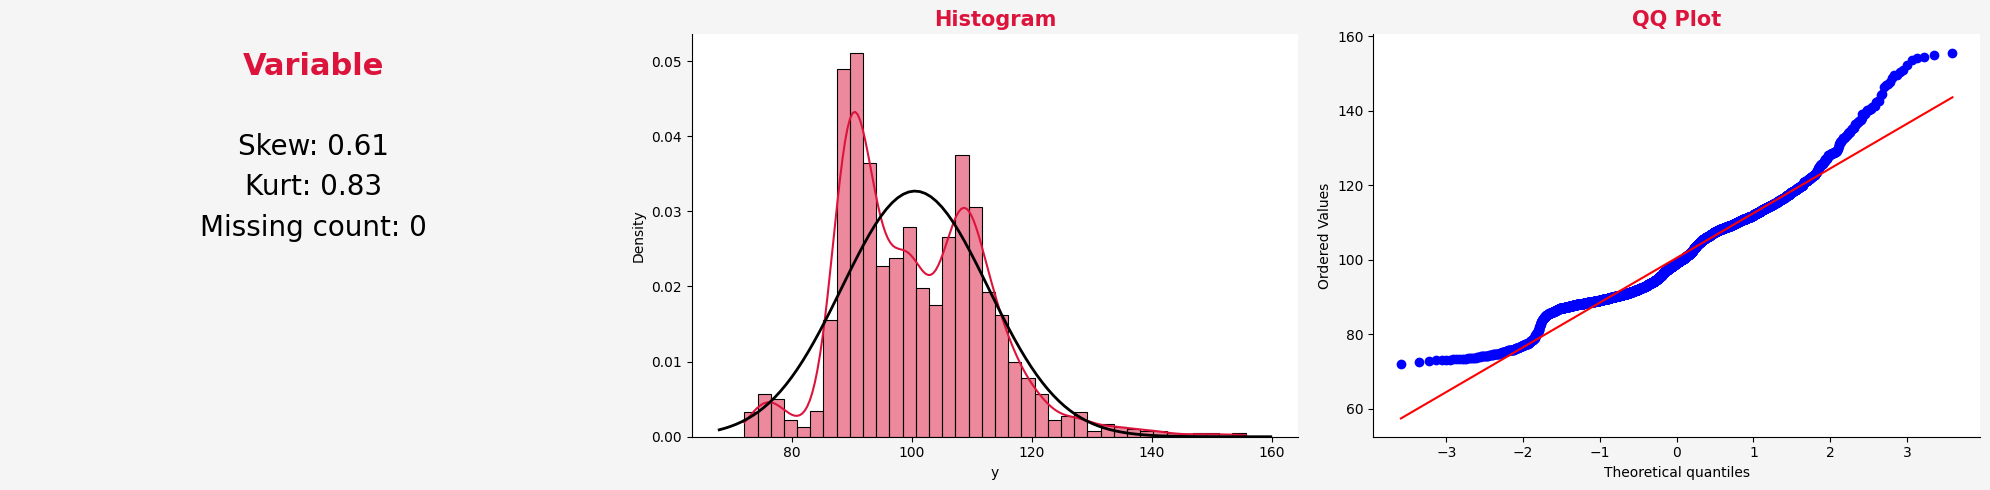

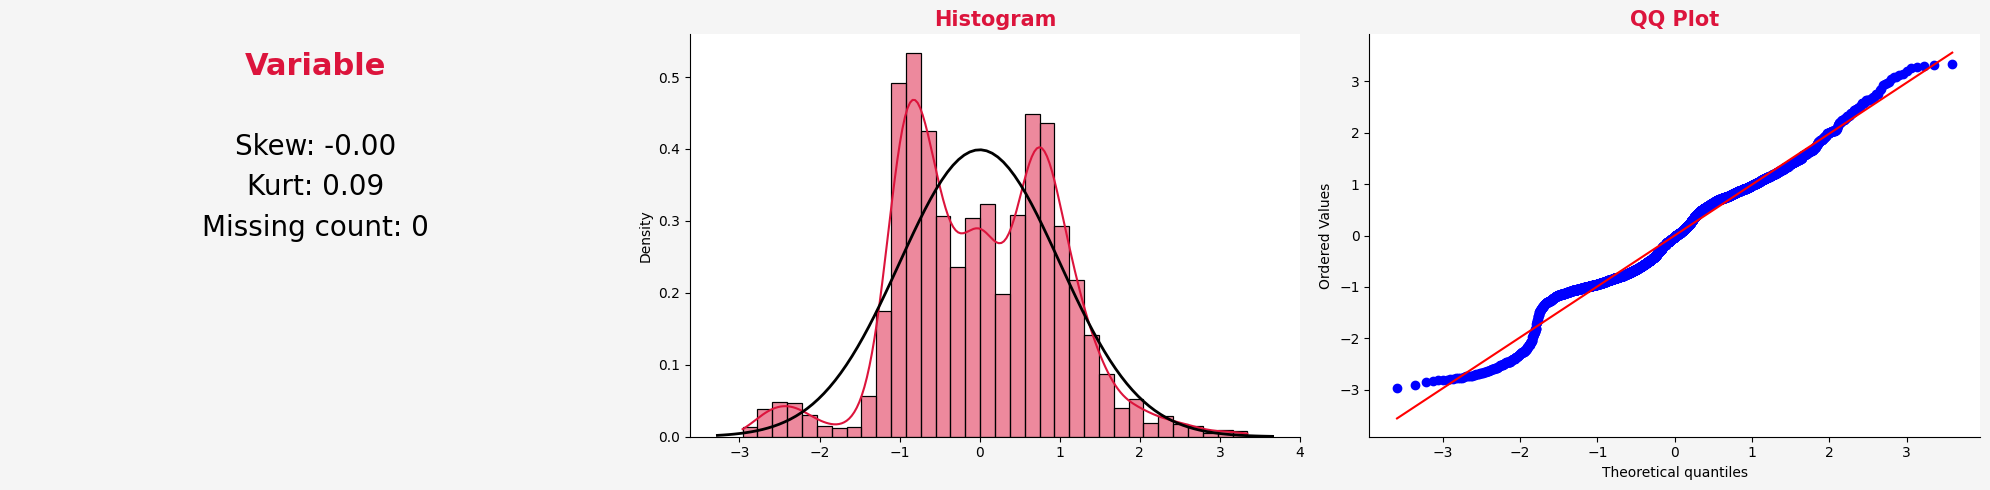

In [26]:
train_df,test_df, all_data= load2()
# y = train_df.y
# X = train_df.drop('y', axis = 1)
num_vars, cat_vars = eda.vars_list(all_data)
all_data = pre.get_dummies(all_data, cat_vars)

train,test = separar(all_data, train_df)
y=train.y
X=train.drop('y', axis = 1)

y = y[y< 156]
plot_variable_distribution(y, use_yeo_johnson=False)
plot_variable_distribution(y, use_yeo_johnson=True)

In [27]:
train_df,test_df, all_data= load2()
# y = train_df.y
# X = train_df.drop('y', axis = 1)
num_vars, cat_vars = eda.vars_list(all_data)
all_data = pre.get_dummies(all_data, cat_vars)

train,test = separar(all_data, train_df)
train


Numerical vars: 
['y' 'X10' 'X11' 'X12' 'X13' 'X14' 'X15' 'X16' 'X17' 'X18' 'X19' 'X20'
 'X21' 'X22' 'X23' 'X24' 'X26' 'X27' 'X28' 'X29' 'X30' 'X31' 'X32' 'X33'
 'X34' 'X35' 'X36' 'X37' 'X38' 'X39' 'X40' 'X41' 'X42' 'X43' 'X44' 'X45'
 'X46' 'X47' 'X48' 'X49' 'X50' 'X51' 'X52' 'X53' 'X54' 'X55' 'X56' 'X57'
 'X58' 'X59' 'X60' 'X61' 'X62' 'X63' 'X64' 'X65' 'X66' 'X67' 'X68' 'X69'
 'X70' 'X71' 'X73' 'X74' 'X75' 'X76' 'X77' 'X78' 'X79' 'X80' 'X81' 'X82'
 'X83' 'X84' 'X85' 'X86' 'X87' 'X88' 'X89' 'X90' 'X91' 'X92' 'X93' 'X94'
 'X95' 'X96' 'X97' 'X98' 'X99' 'X100' 'X101' 'X102' 'X103' 'X104' 'X105'
 'X106' 'X107' 'X108' 'X109' 'X110' 'X111' 'X112' 'X113' 'X114' 'X115'
 'X116' 'X117' 'X118' 'X119' 'X120' 'X122' 'X123' 'X124' 'X125' 'X126'
 'X127' 'X128' 'X129' 'X130' 'X131' 'X132' 'X133' 'X134' 'X135' 'X136'
 'X137' 'X138' 'X139' 'X140' 'X141' 'X142' 'X143' 'X144' 'X145' 'X146'
 'X147' 'X148' 'X150' 'X151' 'X152' 'X153' 'X154' 'X155' 'X156' 'X157'
 'X158' 'X159' 'X160' 'X161' 'X162' 'X163' 'X

,y,X10,X11,X12,X13,X14,X15,X16,X17,X18,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
ID,,,,,,,,,,,,,,,,,,,,,
0,130.81,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,88.53,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,76.26,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
9,80.62,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,78.02,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8405,107.39,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8406,108.77,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8412,109.22,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
train = train[train['y'] < 156]
train

,y,X10,X11,X12,X13,X14,X15,X16,X17,X18,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
ID,,,,,,,,,,,,,,,,,,,,,
0,130.81,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,88.53,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,76.26,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
9,80.62,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,78.02,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8405,107.39,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8406,108.77,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8412,109.22,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
def pipe3():
    train_df,test_df, all_data= load2()
    # y = train_df.y
    # X = train_df.drop('y', axis = 1)
    num_vars, cat_vars = eda.vars_list(all_data)
    all_data = pre.get_dummies(all_data, cat_vars)

    train,test = separar(all_data, train_df)
    train = train[train['y'] < 156] # filtramos segun lo visto
    y=train.y
    X=train.drop('y', axis = 1)

    display(X.head())
    display(X.shape)

    print("\n XGBRegressor \n ")
    score_r2(X,y)

    model_elast = ElasticNetCV(alphas=[0.1, 1, 10], l1_ratio=0.5, cv=5) # Me gusto
    print("\n ElasticNet \n ")
    score_r2(X,y, model_elast)

pipe3()


Numerical vars: 
['y' 'X10' 'X11' 'X12' 'X13' 'X14' 'X15' 'X16' 'X17' 'X18' 'X19' 'X20'
 'X21' 'X22' 'X23' 'X24' 'X26' 'X27' 'X28' 'X29' 'X30' 'X31' 'X32' 'X33'
 'X34' 'X35' 'X36' 'X37' 'X38' 'X39' 'X40' 'X41' 'X42' 'X43' 'X44' 'X45'
 'X46' 'X47' 'X48' 'X49' 'X50' 'X51' 'X52' 'X53' 'X54' 'X55' 'X56' 'X57'
 'X58' 'X59' 'X60' 'X61' 'X62' 'X63' 'X64' 'X65' 'X66' 'X67' 'X68' 'X69'
 'X70' 'X71' 'X73' 'X74' 'X75' 'X76' 'X77' 'X78' 'X79' 'X80' 'X81' 'X82'
 'X83' 'X84' 'X85' 'X86' 'X87' 'X88' 'X89' 'X90' 'X91' 'X92' 'X93' 'X94'
 'X95' 'X96' 'X97' 'X98' 'X99' 'X100' 'X101' 'X102' 'X103' 'X104' 'X105'
 'X106' 'X107' 'X108' 'X109' 'X110' 'X111' 'X112' 'X113' 'X114' 'X115'
 'X116' 'X117' 'X118' 'X119' 'X120' 'X122' 'X123' 'X124' 'X125' 'X126'
 'X127' 'X128' 'X129' 'X130' 'X131' 'X132' 'X133' 'X134' 'X135' 'X136'
 'X137' 'X138' 'X139' 'X140' 'X141' 'X142' 'X143' 'X144' 'X145' 'X146'
 'X147' 'X148' 'X150' 'X151' 'X152' 'X153' 'X154' 'X155' 'X156' 'X157'
 'X158' 'X159' 'X160' 'X161' 'X162' 'X163' 'X

,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
ID,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(4202, 579)


 XGBRegressor 
 
R² Baseline score 
 - Mean: 0.55254 
 - StdDev: 0.02230

 ElasticNet 
 
R² Baseline score 
 - Mean: 0.57965 
 - StdDev: 0.02861


## Ahora normalizaremos "y" con Yeo-Jonson.

In [30]:
def pipe5():
    train_df,test_df, all_data= load2()
    # y = train_df.y
    # X = train_df.drop('y', axis = 1)
    num_vars, cat_vars = eda.vars_list(all_data)
    all_data = pre.get_dummies(all_data, cat_vars)

    train,test = separar(all_data, train_df)
    train = train[train['y'] < 156] # filtramos segun lo visto
    # y=train.y
    
    # Crear una instancia del transformador Yeo-Johnson
    yj_transformer = yjtransformer()

    # Aplicar fit_transform a la columna 'y'
    train_df = yj_transformer.fit_transform(train, 'y')
    y = train_df['y']
    X=train.drop('y', axis = 1)

    display(X.head())
    display(X.shape)

    print("\n XGBRegressor \n ")
    score_r2(X,y)

    model_elast = ElasticNetCV(alphas=[0.1, 1, 10], l1_ratio=0.5, cv=5) # Me gusto
    print("\n ElasticNet \n ")
    score_r2(X,y, model_elast)

pipe5()


Numerical vars: 
['y' 'X10' 'X11' 'X12' 'X13' 'X14' 'X15' 'X16' 'X17' 'X18' 'X19' 'X20'
 'X21' 'X22' 'X23' 'X24' 'X26' 'X27' 'X28' 'X29' 'X30' 'X31' 'X32' 'X33'
 'X34' 'X35' 'X36' 'X37' 'X38' 'X39' 'X40' 'X41' 'X42' 'X43' 'X44' 'X45'
 'X46' 'X47' 'X48' 'X49' 'X50' 'X51' 'X52' 'X53' 'X54' 'X55' 'X56' 'X57'
 'X58' 'X59' 'X60' 'X61' 'X62' 'X63' 'X64' 'X65' 'X66' 'X67' 'X68' 'X69'
 'X70' 'X71' 'X73' 'X74' 'X75' 'X76' 'X77' 'X78' 'X79' 'X80' 'X81' 'X82'
 'X83' 'X84' 'X85' 'X86' 'X87' 'X88' 'X89' 'X90' 'X91' 'X92' 'X93' 'X94'
 'X95' 'X96' 'X97' 'X98' 'X99' 'X100' 'X101' 'X102' 'X103' 'X104' 'X105'
 'X106' 'X107' 'X108' 'X109' 'X110' 'X111' 'X112' 'X113' 'X114' 'X115'
 'X116' 'X117' 'X118' 'X119' 'X120' 'X122' 'X123' 'X124' 'X125' 'X126'
 'X127' 'X128' 'X129' 'X130' 'X131' 'X132' 'X133' 'X134' 'X135' 'X136'
 'X137' 'X138' 'X139' 'X140' 'X141' 'X142' 'X143' 'X144' 'X145' 'X146'
 'X147' 'X148' 'X150' 'X151' 'X152' 'X153' 'X154' 'X155' 'X156' 'X157'
 'X158' 'X159' 'X160' 'X161' 'X162' 'X163' 'X

,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
ID,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(4202, 579)


 XGBRegressor 
 
R² Baseline score 
 - Mean: 0.62485 
 - StdDev: 0.02024

 ElasticNet 
 
R² Baseline score 
 - Mean: 0.50882 
 - StdDev: 0.01766


# Creamos nuevas caracteristicas 

In [31]:
## add some additional features, thanks for this script to @ Vitalii Mokin
def feature_creation(df):
    for i in ['X0', 'X1', 'X2', 'X3', 'X5', 'X6', 'X8']:
        for j in ['X0', 'X1', 'X2', 'X3', 'X5', 'X6', 'X8']:
            df[i + "_" + j] = df[i].astype('str') + "_" + df[j].astype('str')

    return df

""" exp: 

j_s	j_j	j_f	f_o	f_l	f_ae	f_f	f_s	f_j	f_f
19	47	90.81	n	a	ak	f	j	i	s	0	...	i_j	i_i	i_s	s_n	s_a	s_ak	s_f	s_j	s_i	s_s
1339	2648	108.03	ak	v	r	c	ac	d	e	0	...	d_ac	d_d	d_e	e_ak	e_v	e_r	e_c	e_ac	e_d	e_e

"""


# train = feature_creation(train)

# def pipe6():
#     train_df,test_df, all_data= load2()
#     # y = train_df.y
#     # X = train_df.drop('y', axis = 1)
    
#     # creamos las caractesristicas
#     all_data = feature_creation(all_data)
    
#     num_vars, cat_vars = eda.vars_list(all_data)
#     all_data = pre.get_dummies(all_data, cat_vars)

#     train,test = separar(all_data, train_df)
#     train = train[train['y'] < 156] # filtramos segun lo visto
#     # y=train.y
    
#     # Crear una instancia del transformador Yeo-Johnson
#     yj_transformer = yjtransformer()

#     # Aplicar fit_transform a la columna 'y'
#     train_df = yj_transformer.fit_transform(train, 'y')
#     y = train_df['y']
#     X=train.drop('y', axis = 1)

#     display(X.head())
#     display(X.shape)

#     print("\n XGBRegressor \n ")
#     score_r2(X,y)

#     model_elast = ElasticNetCV(alphas=[0.1, 1, 10], l1_ratio=0.5, cv=5) # Me gusto
#     print("\n ElasticNet \n ")
#     score_r2(X,y, model_elast)

# pipe6()

"""
(4202, 16232)

 XGBRegressor 
 
R² Baseline score 
 - Mean: 0.63853 
 - StdDev: 0.03118

 ElasticNet 
 
R² Baseline score 
 - Mean: 0.50918 
 - StdDev: 0.01767
"""

'\n(4202, 16232)\n\n XGBRegressor \n \nR² Baseline score \n - Mean: 0.63853 \n - StdDev: 0.03118\n\n ElasticNet \n \nR² Baseline score \n - Mean: 0.50918 \n - StdDev: 0.01767\n'

In [32]:
from xgboost import XGBRegressor
import optuna

train_df,test_df, all_data= load2()
# y = train_df.y
# X = train_df.drop('y', axis = 1)
num_vars, cat_vars = eda.vars_list(all_data)
all_data = pre.get_dummies(all_data, cat_vars)

train,test = separar(all_data, train_df)
train = train[train['y'] < 156] # filtramos segun lo visto en el grafico de distribucion
# y=train.y

# Crear una instancia del transformador Yeo-Johnson
yj_transformer = yjtransformer()

# Aplicar fit_transform a la columna 'y'
train_df = yj_transformer.fit_transform(train, 'y')
y = train_df['y']
X=train.drop('y', axis = 1)

display(X.head())
display(X.shape)

# print("\n XGBRegressor \n ")
# score_r2(X,y)
def objective(trial):
    xgb_params = dict(
        max_depth=trial.suggest_int("max_depth", 2, 10),
        learning_rate=trial.suggest_float("learning_rate", 1e-4, 1e-1, log=True),
        n_estimators=trial.suggest_int("n_estimators", 1000, 8000),
        min_child_weight=trial.suggest_int("min_child_weight", 1, 10),
        colsample_bytree=trial.suggest_float("colsample_bytree", 0.2, 1.0),
        subsample=trial.suggest_float("subsample", 0.2, 1.0),
        reg_alpha=trial.suggest_float("reg_alpha", 1e-4, 1e2, log=True),
        reg_lambda=trial.suggest_float("reg_lambda", 1e-4, 1e2, log=True),
        # Parámetro para usar la GPU
        tree_method="gpu_hist",
        predictor="gpu_predictor"
    )
    xgb = XGBRegressor(**xgb_params)
    return score_r2(X, y, xgb)

# Crear el estudio con Optuna y optimizar los hiperparámetros
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)
xgb_params = study.best_params



Numerical vars: 
['y' 'X10' 'X11' 'X12' 'X13' 'X14' 'X15' 'X16' 'X17' 'X18' 'X19' 'X20'
 'X21' 'X22' 'X23' 'X24' 'X26' 'X27' 'X28' 'X29' 'X30' 'X31' 'X32' 'X33'
 'X34' 'X35' 'X36' 'X37' 'X38' 'X39' 'X40' 'X41' 'X42' 'X43' 'X44' 'X45'
 'X46' 'X47' 'X48' 'X49' 'X50' 'X51' 'X52' 'X53' 'X54' 'X55' 'X56' 'X57'
 'X58' 'X59' 'X60' 'X61' 'X62' 'X63' 'X64' 'X65' 'X66' 'X67' 'X68' 'X69'
 'X70' 'X71' 'X73' 'X74' 'X75' 'X76' 'X77' 'X78' 'X79' 'X80' 'X81' 'X82'
 'X83' 'X84' 'X85' 'X86' 'X87' 'X88' 'X89' 'X90' 'X91' 'X92' 'X93' 'X94'
 'X95' 'X96' 'X97' 'X98' 'X99' 'X100' 'X101' 'X102' 'X103' 'X104' 'X105'
 'X106' 'X107' 'X108' 'X109' 'X110' 'X111' 'X112' 'X113' 'X114' 'X115'
 'X116' 'X117' 'X118' 'X119' 'X120' 'X122' 'X123' 'X124' 'X125' 'X126'
 'X127' 'X128' 'X129' 'X130' 'X131' 'X132' 'X133' 'X134' 'X135' 'X136'
 'X137' 'X138' 'X139' 'X140' 'X141' 'X142' 'X143' 'X144' 'X145' 'X146'
 'X147' 'X148' 'X150' 'X151' 'X152' 'X153' 'X154' 'X155' 'X156' 'X157'
 'X158' 'X159' 'X160' 'X161' 'X162' 'X163' 'X

,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
ID,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(4202, 579)

[I 2024-08-22 22:21:07,891] A new study created in memory with name: no-name-05bb24cb-a6dc-40c4-9ac6-29ce921b4e99
[I 2024-08-22 22:21:36,347] Trial 0 finished with value: 0.4324591783359029 and parameters: {'max_depth': 6, 'learning_rate': 0.0004596541680642663, 'n_estimators': 1152, 'min_child_weight': 5, 'colsample_bytree': 0.692504220853837, 'subsample': 0.7768271374114781, 'reg_alpha': 1.528536803662485, 'reg_lambda': 0.0005342479561893958}. Best is trial 0 with value: 0.4324591783359029.


R² Baseline score 
 - Mean: 0.43246 
 - StdDev: 0.01103


[I 2024-08-22 22:23:00,733] Trial 1 finished with value: 0.621137054951756 and parameters: {'max_depth': 2, 'learning_rate': 0.08654855072147914, 'n_estimators': 4761, 'min_child_weight': 6, 'colsample_bytree': 0.7146108069117614, 'subsample': 0.9413916685820627, 'reg_alpha': 0.0008100048873119948, 'reg_lambda': 0.00032660013730081863}. Best is trial 1 with value: 0.621137054951756.


R² Baseline score 
 - Mean: 0.62114 
 - StdDev: 0.02091


[I 2024-08-22 22:23:34,867] Trial 2 finished with value: 0.656337177744694 and parameters: {'max_depth': 6, 'learning_rate': 0.006325804829573717, 'n_estimators': 1520, 'min_child_weight': 9, 'colsample_bytree': 0.5500706603730393, 'subsample': 0.49592629716642195, 'reg_alpha': 0.001209386940768213, 'reg_lambda': 0.0009936297791325178}. Best is trial 2 with value: 0.656337177744694.


R² Baseline score 
 - Mean: 0.65634 
 - StdDev: 0.02654


[I 2024-08-22 22:26:20,157] Trial 3 finished with value: 0.6301739668943782 and parameters: {'max_depth': 10, 'learning_rate': 0.0002716967108784057, 'n_estimators': 6168, 'min_child_weight': 9, 'colsample_bytree': 0.31994465991577636, 'subsample': 0.9486485797277626, 'reg_alpha': 1.5548745345882764, 'reg_lambda': 0.4860892306411877}. Best is trial 2 with value: 0.656337177744694.


R² Baseline score 
 - Mean: 0.63017 
 - StdDev: 0.02065


[I 2024-08-22 22:27:48,340] Trial 4 finished with value: 0.6307645201882843 and parameters: {'max_depth': 2, 'learning_rate': 0.03841664272829626, 'n_estimators': 5369, 'min_child_weight': 1, 'colsample_bytree': 0.5427700178298092, 'subsample': 0.8118240829992218, 'reg_alpha': 0.001221136190027519, 'reg_lambda': 0.18077606121040227}. Best is trial 2 with value: 0.656337177744694.


R² Baseline score 
 - Mean: 0.63076 
 - StdDev: 0.02075


[I 2024-08-22 22:29:01,077] Trial 5 finished with value: 0.6065534226531314 and parameters: {'max_depth': 10, 'learning_rate': 0.042773845542060394, 'n_estimators': 2181, 'min_child_weight': 3, 'colsample_bytree': 0.7780020089953283, 'subsample': 0.9280573307183482, 'reg_alpha': 0.0003365588646065819, 'reg_lambda': 1.1470896913582158}. Best is trial 2 with value: 0.656337177744694.


R² Baseline score 
 - Mean: 0.60655 
 - StdDev: 0.03849


[I 2024-08-22 22:31:56,783] Trial 6 finished with value: 0.461459920989042 and parameters: {'max_depth': 7, 'learning_rate': 0.07995082749418403, 'n_estimators': 7048, 'min_child_weight': 3, 'colsample_bytree': 0.8228616604286767, 'subsample': 0.24555947073260712, 'reg_alpha': 0.0049950092387418725, 'reg_lambda': 0.00019573519867926975}. Best is trial 2 with value: 0.656337177744694.


R² Baseline score 
 - Mean: 0.46146 
 - StdDev: 0.06302


[I 2024-08-22 22:33:44,820] Trial 7 finished with value: 0.6643343955716328 and parameters: {'max_depth': 4, 'learning_rate': 0.0008979307206381652, 'n_estimators': 5222, 'min_child_weight': 10, 'colsample_bytree': 0.9999940462977224, 'subsample': 0.23483899688109108, 'reg_alpha': 0.000561070042694382, 'reg_lambda': 0.3109666998930881}. Best is trial 7 with value: 0.6643343955716328.


R² Baseline score 
 - Mean: 0.66433 
 - StdDev: 0.02693


[I 2024-08-22 22:37:04,849] Trial 8 finished with value: 0.6264153919308573 and parameters: {'max_depth': 9, 'learning_rate': 0.004079108663704094, 'n_estimators': 7041, 'min_child_weight': 5, 'colsample_bytree': 0.3167788870591851, 'subsample': 0.4318998662274709, 'reg_alpha': 0.06839213129244506, 'reg_lambda': 0.2587316464151495}. Best is trial 7 with value: 0.6643343955716328.


R² Baseline score 
 - Mean: 0.62642 
 - StdDev: 0.03369


[I 2024-08-22 22:38:45,216] Trial 9 finished with value: 0.6428283215552483 and parameters: {'max_depth': 4, 'learning_rate': 0.015144317065573062, 'n_estimators': 4978, 'min_child_weight': 3, 'colsample_bytree': 0.7070028910532999, 'subsample': 0.8814620785424894, 'reg_alpha': 0.0003940188805393133, 'reg_lambda': 30.52991287012299}. Best is trial 7 with value: 0.6643343955716328.


R² Baseline score 
 - Mean: 0.64283 
 - StdDev: 0.02328


[I 2024-08-22 22:39:53,704] Trial 10 finished with value: 0.5339117177097568 and parameters: {'max_depth': 4, 'learning_rate': 0.0009883172107543426, 'n_estimators': 3359, 'min_child_weight': 10, 'colsample_bytree': 0.8645500915954195, 'subsample': 0.20679551327144663, 'reg_alpha': 45.53903741421769, 'reg_lambda': 0.008680194810703782}. Best is trial 7 with value: 0.6643343955716328.


R² Baseline score 
 - Mean: 0.53391 
 - StdDev: 0.02164


[I 2024-08-22 22:41:05,459] Trial 11 finished with value: 0.6630513767060051 and parameters: {'max_depth': 4, 'learning_rate': 0.002742515425771646, 'n_estimators': 3451, 'min_child_weight': 8, 'colsample_bytree': 0.48940502211376413, 'subsample': 0.5279257188257735, 'reg_alpha': 0.019622635377954455, 'reg_lambda': 0.006368533162289992}. Best is trial 7 with value: 0.6643343955716328.


R² Baseline score 
 - Mean: 0.66305 
 - StdDev: 0.02583


[I 2024-08-22 22:42:18,921] Trial 12 finished with value: 0.3307249737455081 and parameters: {'max_depth': 4, 'learning_rate': 0.00010019376487121943, 'n_estimators': 3448, 'min_child_weight': 7, 'colsample_bytree': 0.980969965319956, 'subsample': 0.6291060839717657, 'reg_alpha': 0.02077514145031712, 'reg_lambda': 0.013546663136849824}. Best is trial 7 with value: 0.6643343955716328.


R² Baseline score 
 - Mean: 0.33072 
 - StdDev: 0.00685


[I 2024-08-22 22:43:24,332] Trial 13 finished with value: 0.6656395311870387 and parameters: {'max_depth': 3, 'learning_rate': 0.0014507936598009742, 'n_estimators': 3418, 'min_child_weight': 8, 'colsample_bytree': 0.4267396247082566, 'subsample': 0.348765858516046, 'reg_alpha': 0.36065463190494457, 'reg_lambda': 0.01302775670982488}. Best is trial 13 with value: 0.6656395311870387.


R² Baseline score 
 - Mean: 0.66564 
 - StdDev: 0.02446


[I 2024-08-22 22:44:41,301] Trial 14 finished with value: 0.665006822555578 and parameters: {'max_depth': 3, 'learning_rate': 0.0012462450195729492, 'n_estimators': 4003, 'min_child_weight': 10, 'colsample_bytree': 0.40608981457838644, 'subsample': 0.3510040165380503, 'reg_alpha': 0.6109047290820083, 'reg_lambda': 4.505497764936845}. Best is trial 13 with value: 0.6656395311870387.


R² Baseline score 
 - Mean: 0.66501 
 - StdDev: 0.02449


[I 2024-08-22 22:45:23,812] Trial 15 finished with value: 0.6312611307419438 and parameters: {'max_depth': 2, 'learning_rate': 0.0009670911190981774, 'n_estimators': 2469, 'min_child_weight': 8, 'colsample_bytree': 0.42468045158518675, 'subsample': 0.3514265849156382, 'reg_alpha': 1.0098694924382337, 'reg_lambda': 7.116750407199628}. Best is trial 13 with value: 0.6656395311870387.


R² Baseline score 
 - Mean: 0.63126 
 - StdDev: 0.01969


[I 2024-08-22 22:46:35,777] Trial 16 finished with value: 0.6493160820076802 and parameters: {'max_depth': 3, 'learning_rate': 0.002116449375163926, 'n_estimators': 3961, 'min_child_weight': 7, 'colsample_bytree': 0.20492244326586373, 'subsample': 0.3565917149738785, 'reg_alpha': 9.730414512526673, 'reg_lambda': 67.83787099917214}. Best is trial 13 with value: 0.6656395311870387.


R² Baseline score 
 - Mean: 0.64932 
 - StdDev: 0.02326


[I 2024-08-22 22:47:30,695] Trial 17 finished with value: 0.6472293482013137 and parameters: {'max_depth': 6, 'learning_rate': 0.010049287683819755, 'n_estimators': 2299, 'min_child_weight': 10, 'colsample_bytree': 0.3982009906193014, 'subsample': 0.6476147441026676, 'reg_alpha': 0.2554150221805507, 'reg_lambda': 3.2034661608394646}. Best is trial 13 with value: 0.6656395311870387.


R² Baseline score 
 - Mean: 0.64723 
 - StdDev: 0.02689


[I 2024-08-22 22:49:01,050] Trial 18 finished with value: 0.5438530146220656 and parameters: {'max_depth': 5, 'learning_rate': 0.00025979557429651047, 'n_estimators': 4265, 'min_child_weight': 8, 'colsample_bytree': 0.22828037044853236, 'subsample': 0.3404782830911811, 'reg_alpha': 0.27249911567419693, 'reg_lambda': 0.033568563923105414}. Best is trial 13 with value: 0.6656395311870387.


R² Baseline score 
 - Mean: 0.54385 
 - StdDev: 0.01476


[I 2024-08-22 22:51:34,139] Trial 19 finished with value: 0.6577530003158545 and parameters: {'max_depth': 8, 'learning_rate': 0.0016508102663231013, 'n_estimators': 5854, 'min_child_weight': 9, 'colsample_bytree': 0.613384452160282, 'subsample': 0.45734761062862733, 'reg_alpha': 5.953655126037651, 'reg_lambda': 0.002369964127410142}. Best is trial 13 with value: 0.6656395311870387.


R² Baseline score 
 - Mean: 0.65775 
 - StdDev: 0.02725


In [33]:
xgb_params

{'max_depth': 3,
 'learning_rate': 0.0014507936598009742,
 'n_estimators': 3418,
 'min_child_weight': 8,
 'colsample_bytree': 0.4267396247082566,
 'subsample': 0.348765858516046,
 'reg_alpha': 0.36065463190494457,
 'reg_lambda': 0.01302775670982488}

# entrenamos el modelo con los mejores hyperparametros y evaluamos con "test"

In [48]:
from sklearn.preprocessing import PowerTransformer

# Crear y ajustar el transformador de Yeo-Johnson
transformer = PowerTransformer(method='yeo-johnson')

# Cargar los datos
train_df, test_df, all_data = load2()

# Obtener variables numéricas y categóricas
num_vars, cat_vars = eda.vars_list(all_data)

# Aplicar one-hot encoding a las variables categóricas
all_data = pre.get_dummies(all_data, cat_vars)

# Separar en conjuntos de entrenamiento y prueba
train, test = separar(all_data, train_df)

# Filtrar los datos de entrenamiento según la distribución observada
train = train[train['y'] < 156]

# Separar la variable objetivo 'y' del resto de las características
y = train[['y']]  # Necesitamos que 'y' sea un DataFrame para que funcione con el transformador
X = train.drop('y', axis=1)

# Aplicar fit_transform a la columna 'y'
y_transformed = transformer.fit_transform(y)

# Reemplazar la columna 'y' transformada en el DataFrame de entrenamiento
train['y'] = y_transformed

y = train['y']
train.drop('y', axis=1, inplace = True)

# Mostrar los primeros registros de X y las dimensiones de X
display(X.head())
display(X.shape)



Numerical vars: 
['y' 'X10' 'X11' 'X12' 'X13' 'X14' 'X15' 'X16' 'X17' 'X18' 'X19' 'X20'
 'X21' 'X22' 'X23' 'X24' 'X26' 'X27' 'X28' 'X29' 'X30' 'X31' 'X32' 'X33'
 'X34' 'X35' 'X36' 'X37' 'X38' 'X39' 'X40' 'X41' 'X42' 'X43' 'X44' 'X45'
 'X46' 'X47' 'X48' 'X49' 'X50' 'X51' 'X52' 'X53' 'X54' 'X55' 'X56' 'X57'
 'X58' 'X59' 'X60' 'X61' 'X62' 'X63' 'X64' 'X65' 'X66' 'X67' 'X68' 'X69'
 'X70' 'X71' 'X73' 'X74' 'X75' 'X76' 'X77' 'X78' 'X79' 'X80' 'X81' 'X82'
 'X83' 'X84' 'X85' 'X86' 'X87' 'X88' 'X89' 'X90' 'X91' 'X92' 'X93' 'X94'
 'X95' 'X96' 'X97' 'X98' 'X99' 'X100' 'X101' 'X102' 'X103' 'X104' 'X105'
 'X106' 'X107' 'X108' 'X109' 'X110' 'X111' 'X112' 'X113' 'X114' 'X115'
 'X116' 'X117' 'X118' 'X119' 'X120' 'X122' 'X123' 'X124' 'X125' 'X126'
 'X127' 'X128' 'X129' 'X130' 'X131' 'X132' 'X133' 'X134' 'X135' 'X136'
 'X137' 'X138' 'X139' 'X140' 'X141' 'X142' 'X143' 'X144' 'X145' 'X146'
 'X147' 'X148' 'X150' 'X151' 'X152' 'X153' 'X154' 'X155' 'X156' 'X157'
 'X158' 'X159' 'X160' 'X161' 'X162' 'X163' 'X

,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
ID,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(4202, 579)

In [49]:
y

ID
0       2.144145
6      -1.010280
7      -2.406498
9      -1.872797
13     -2.185509
          ...   
8405    0.635129
8406    0.737862
8412    0.770925
8415   -1.117784
8417    0.888940
Name: y, Length: 4202, dtype: float64

In [50]:
# X_train, X_test = create_features(df_train, df_test)

# y_train = df_train.loc[:, "SalePrice"]

xgb = XGBRegressor(**xgb_params)

xgb.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.4267396247082566, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.0014507936598009742, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=8, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=3418, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
test = test.drop("y", axis = 1)

In [53]:

predictions_ = xgb.predict(test)
# Reformatear predictions_ para que sea un array 2D
predictions_2D = predictions_.reshape(-1, 1)

# Aplicar la transformación inversa
predictions = transformer.inverse_transform(predictions_2D)

# Si quieres volver a un array 1D después de la transformación inversa
predictions = predictions.flatten()

# Mostrar las predicciones invertidas
print(predictions)

[ 78.40901   93.212204  78.599594 ...  92.855156 110.835075  92.38456 ]


In [54]:
output = pd.DataFrame({'ID': test.index, 'y': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
